In [4]:
import sys, os
sys.path.append(os.path.abspath('..'))

from ImageLab import *

import numpy as np
from skimage.feature import hog

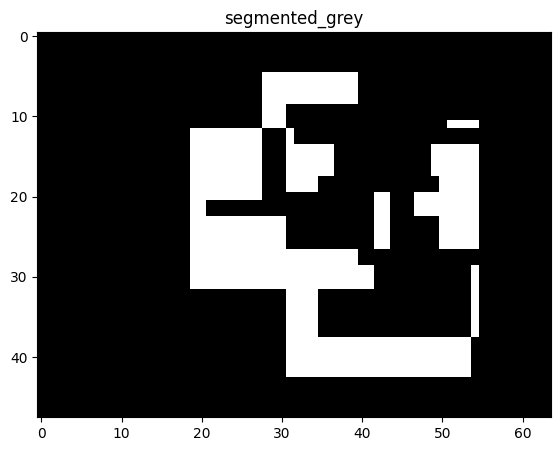

In [2]:
folder_name = 'TrainImages/Intermediate'

# inverted, inverted_path = ColorSpace('TrainImages/3.jpg', folder_name, 'inverted').process(inversion())
# gray, inverted_path = ColorSpace(inverted_path, folder_name, 'gray').process(rgb_to_grayscale())

# gamma, gamma_path = Filters(inverted_path, folder_name, '4', plot = True).process(gamma_correction(4))

# sauvola, sauvola_path = Segment(gamma_path, folder_name, 'adaptive_threshold1').process(Pixel_Filter(3, 50, 'Sauvola'))
# seggrey = sauvola * gamma

image = ImageUtil().load_image_from_file('detection_images/14_Medium.png')

ImagePlotter(image).plot_image('segmented_grey')

In [3]:
# tower_folder = 'Towers/'

# s = ImageFilters(seggrey, plot=True).process(subimage(380, 190, 210, 350))
# ImageUtil(s).save_image_to_folder(tower_folder, 'Pole1.png')

In [9]:
kernel = np.array([0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0])


def pipeline(img_path, folder, name):
    inverted, inverted_path = ColorSpace(img_path, folder_name, 'inverted').process(inversion())
    gray = ImageColorSpace(inverted, plot=False).process(rgb_to_grayscale())
    dilated = ImageProcessor(gray).process(Dilation(), kernel)
    closed = ImageProcessor(dilated).process(Erosion(), kernel)

    sauvola = ImageSegment(closed).process(Pixel_Filter(3, 50, 'Sauvola'))
    seggrey = sauvola * closed
    seggrey = np.squeeze(seggrey)
    _=ImageUtil(seggrey).save_image_to_folder(folder, name)
    return seggrey

TypeError: array() takes from 1 to 2 positional arguments but 3 were given

(482, 642, 1)
(482, 642, 1)
(482, 642, 1)
(482, 642, 1)
(426, 642, 1)
(482, 642, 1)
(482, 642, 1)
(855, 642, 1)
(482, 642, 1)
(490, 642, 1)
(961, 642, 1)
(482, 642, 1)
(320, 642, 1)
(482, 642, 1)
(855, 642, 1)
(409, 642, 1)
(482, 642, 1)
(482, 642, 1)
(482, 642, 1)
(362, 642, 1)
(854, 642, 1)


c:\Programs\Image Processing\Color Space\Image\PowerLineProject\ImageLab\imageutils.py:269: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))


(429, 642, 1)
(582, 642, 1)
(482, 642, 1)
(362, 642, 1)
(373, 642, 1)
(482, 642, 1)
(743, 642, 1)
(362, 642, 1)


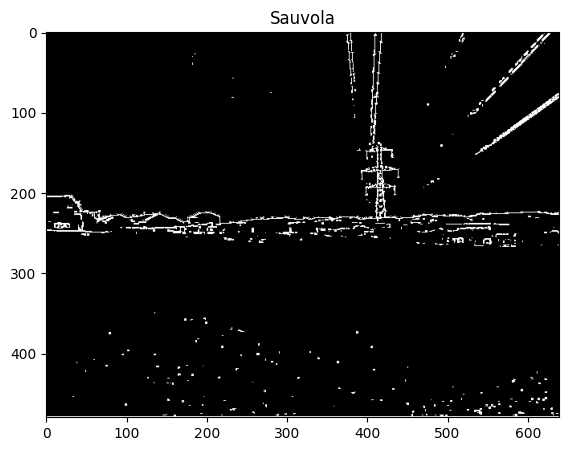

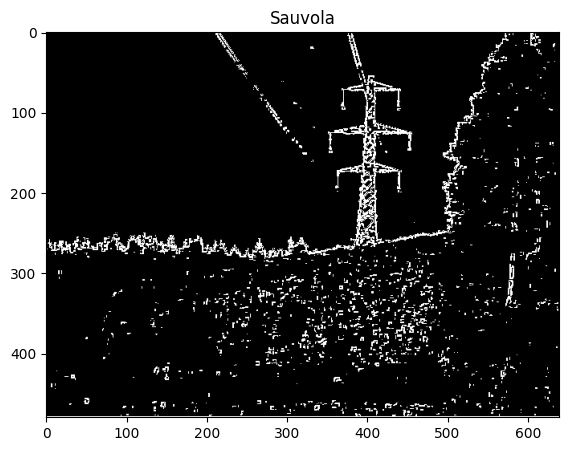

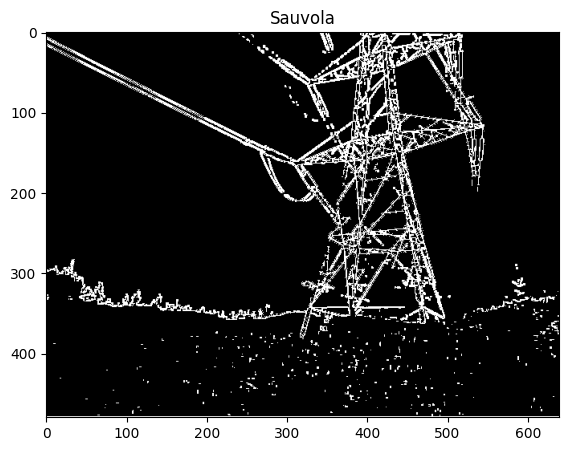

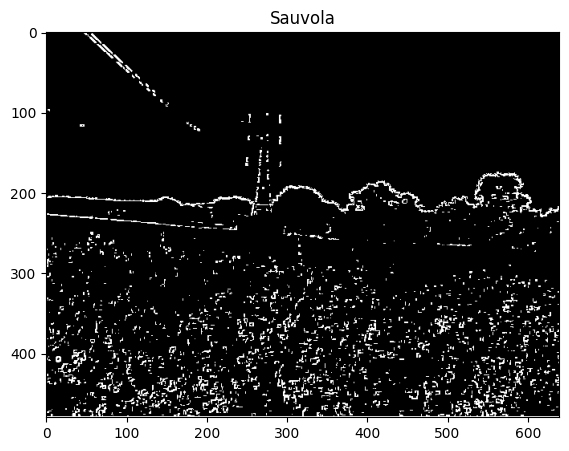

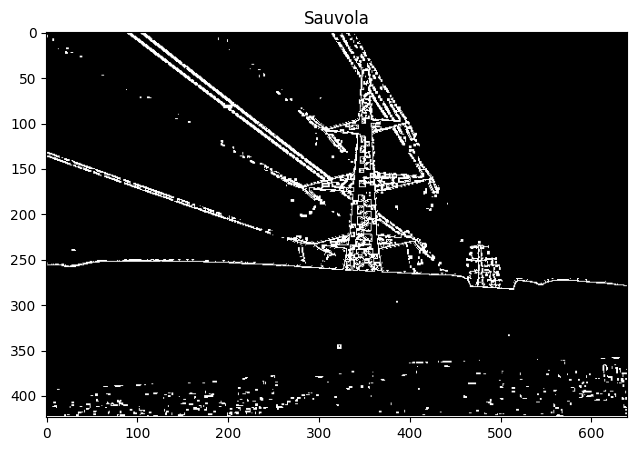

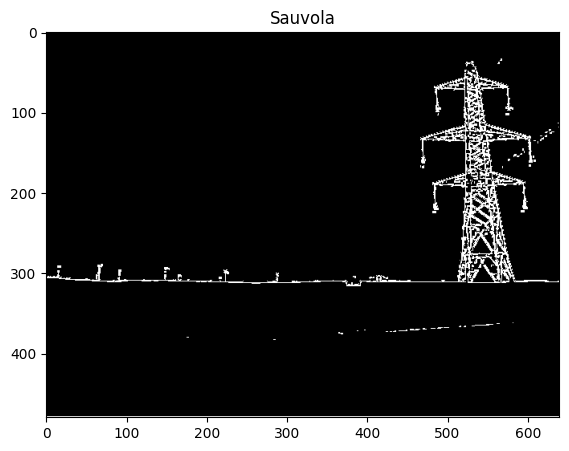

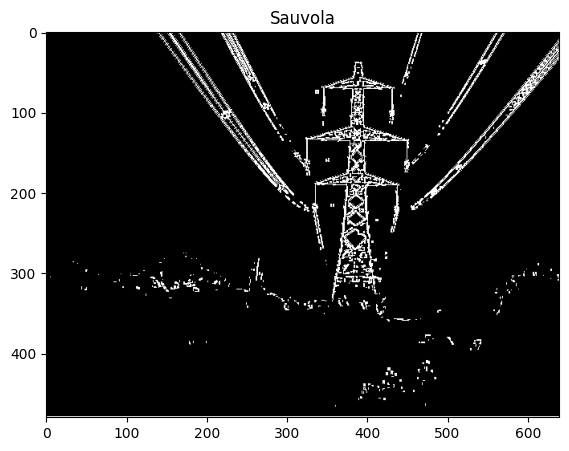

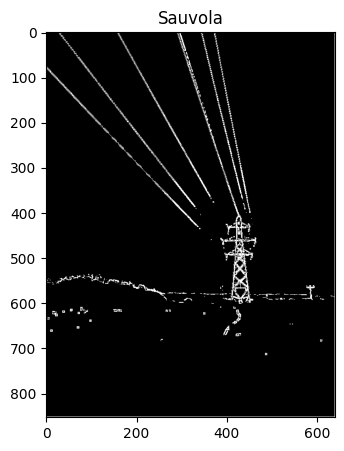

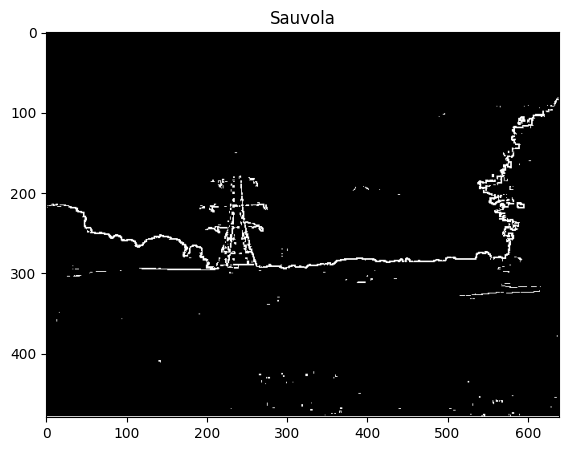

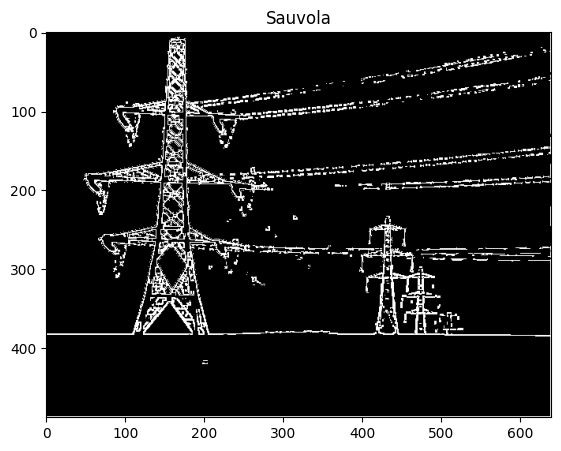

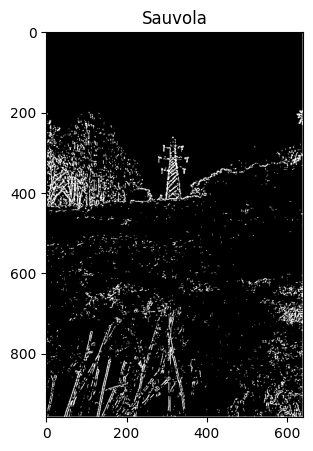

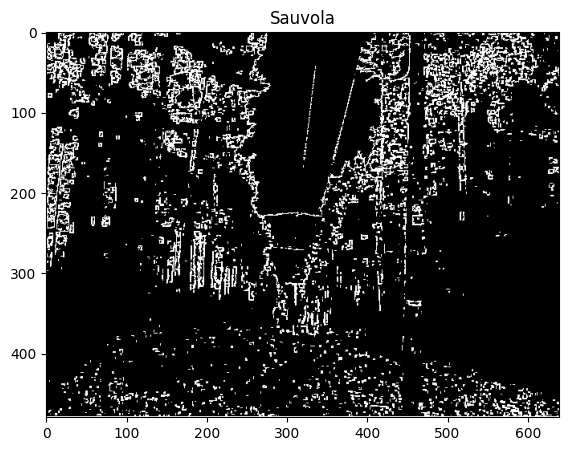

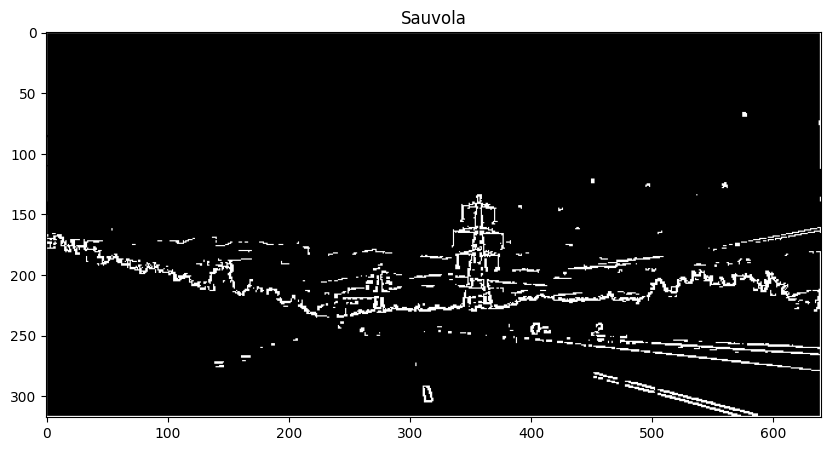

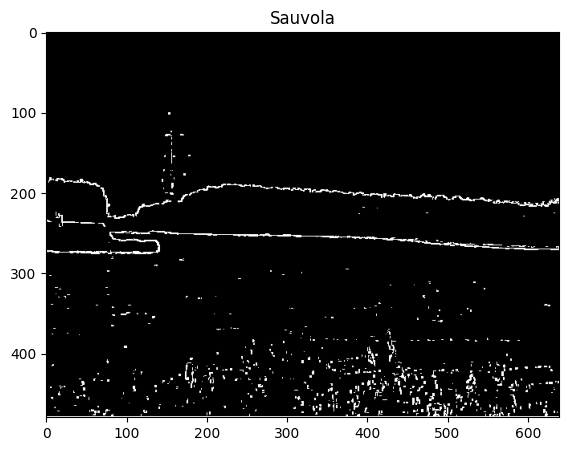

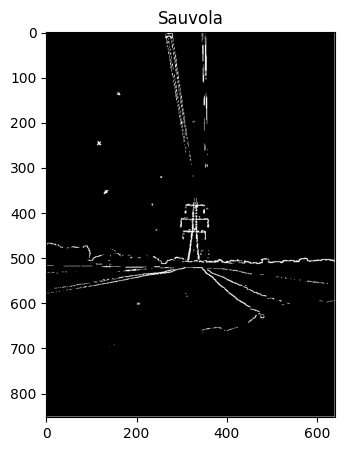

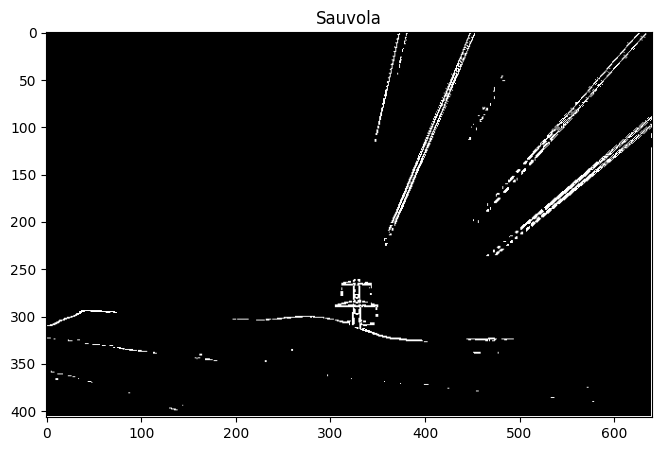

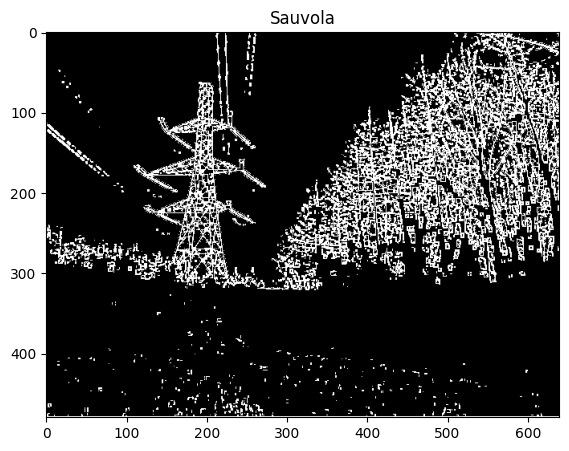

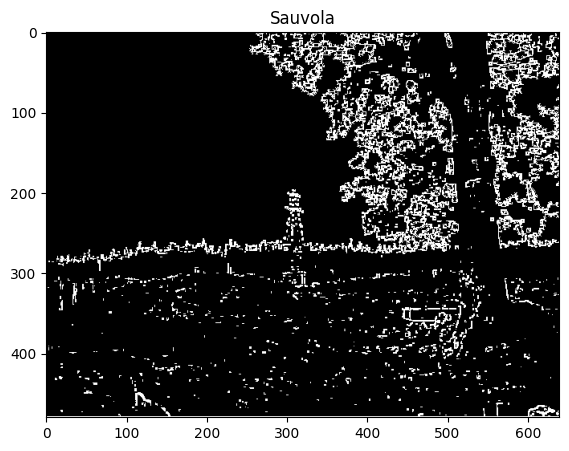

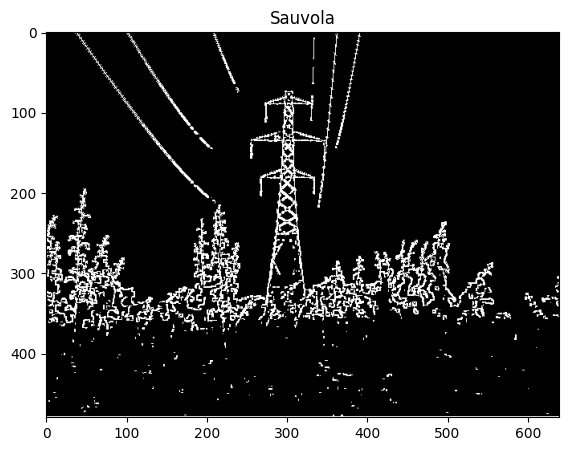

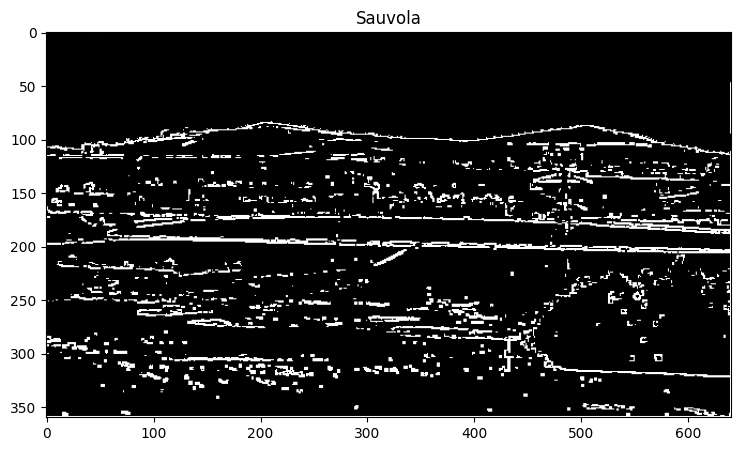

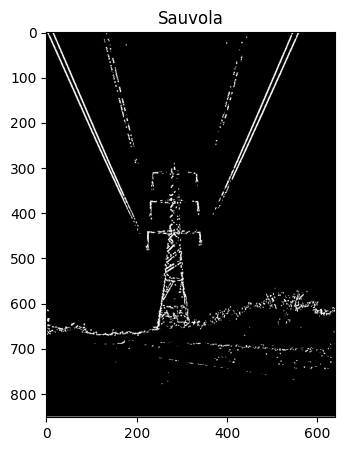

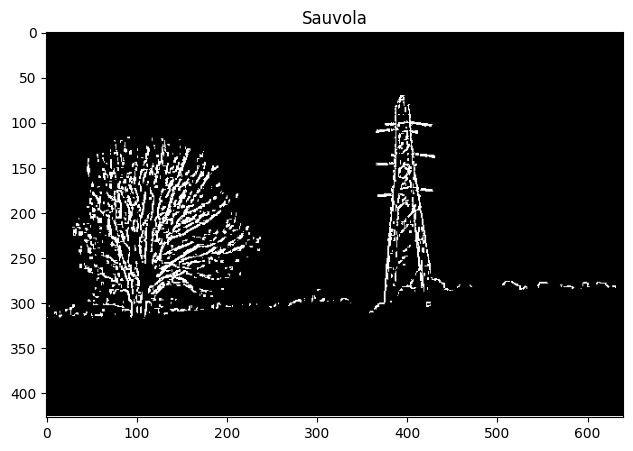

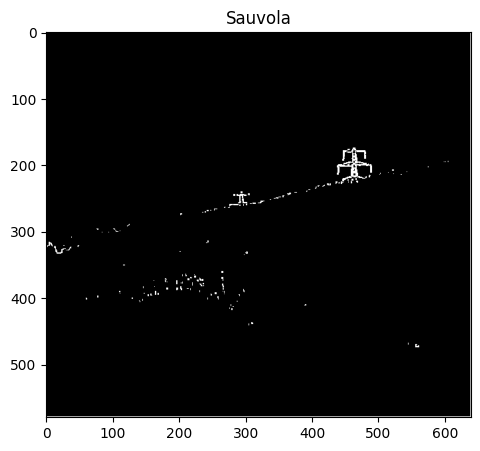

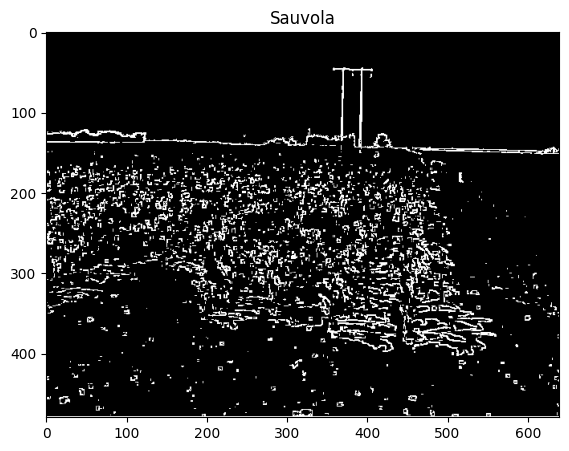

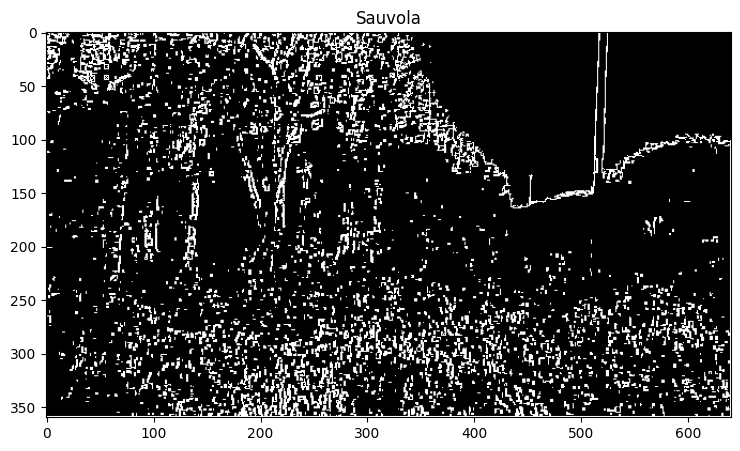

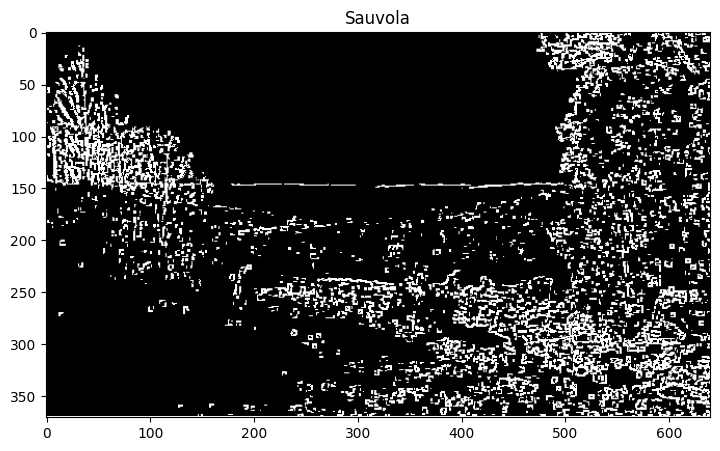

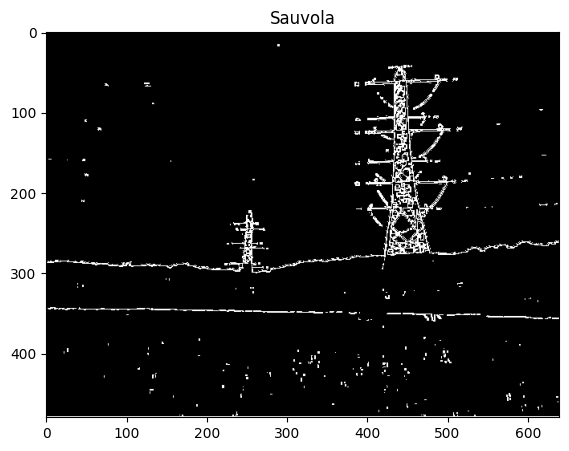

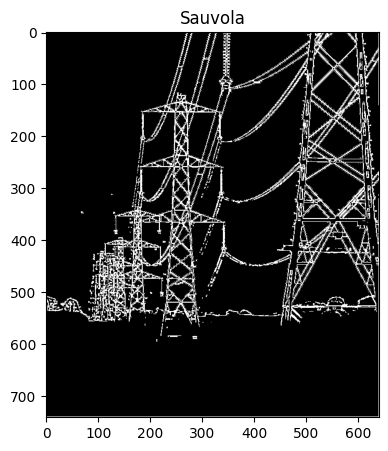

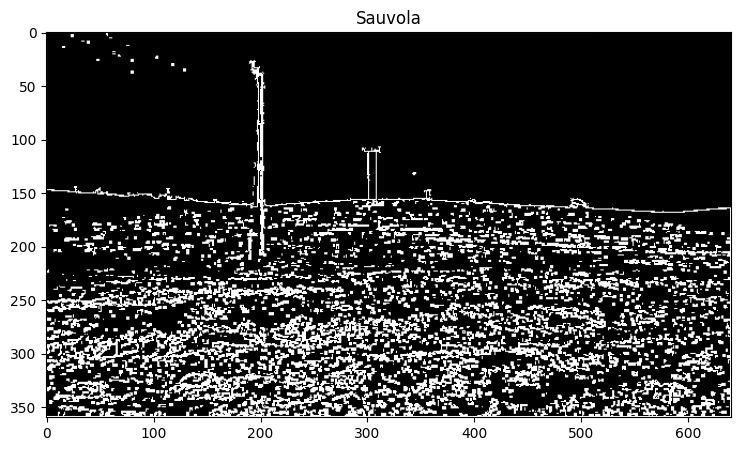

In [10]:
import os

# set the path to your test images folder
target_folder = 'test_images'
ref_folder = 'Towers'
output_folder = 'detection_images'

chi_difference = 1

# loop through each image file in the folder
for file_name in os.listdir(target_folder):
    # check if the file is an image file
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        
        img_path = os.path.join(target_folder, file_name)
        file_name = os.path.splitext(file_name)[0]
        
        segimg = pipeline(img_path, 'Morphological', f'{file_name}.png')
        
        for test_name in os.listdir(ref_folder):
            if test_name.endswith('.jpg') or test_name.endswith('.png'):
                ref_img = ImageUtil().load_image(ref_folder, test_name)
                test_name = os.path.splitext(test_name)[0]
                detection_image = ImageFilters(segimg).process(HOG(ref_img, chi_difference))
                ImageUtil(detection_image).save_image_to_folder(output_folder, f'{file_name}_{test_name}.png')
                
        
    